In [ ]:
#Installations
!apt install gdal-bin python-gdal python3-gdal 
!pip install rasterio
!apt install python3-rtree 
!pip install git+git://github.com/geopandas/geopandas.git
!pip install descartes
!pip install geopandas

In [4]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import show

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Access Cloud Optimized Geotiffs with AWS

In [45]:
fpath = '/content/drive/MyDrive/Yosemite/Elevation2.tif'

from rasterio.enums import Resampling

factors = [2, 4, 8, 16]
dst = rio.open(fpath, 'r+')
dst.build_overviews(factors, Resampling.average)
dst.update_tags(ns='rio_overview', resampling='average')
dst.close()

def rasterio_open(f):
    return rio.open(f)

src_image = rasterio_open(fpath)
print(src_image.profile)


{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 1468, 'height': 374, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.0008983152841195214, 0.0, -120.25301425332455,
       0.0, -0.0008983152841195214, 37.91343608701719), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}


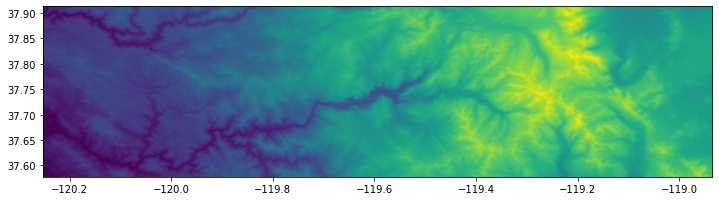

In [46]:
fig, ax = plt.subplots(1, figsize=(12, 10))
show(src_image, ax=ax)
plt.show()

In [47]:
src_image_array = src_image.read(1)
src_image_array = src_image_array.astype("f4")
src_image_array
src_image_array[src_image_array==0] = np.nan

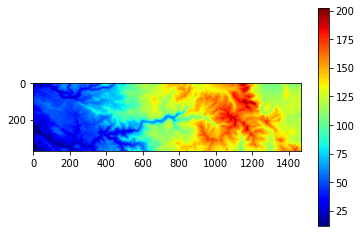

In [44]:
#fig, ax = plt.subplots(1, figsize=(12, 10))
shw = plt.imshow(src_image_array, cmap = "jet")
plt.colorbar(shw)
plt.show()

In [48]:
src_image.profile

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 1468, 'height': 374, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.0008983152841195214, 0.0, -120.25301425332455,
       0.0, -0.0008983152841195214, 37.91343608701719), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}

## Get subset of the image

Window(col_off, row_off, width, height)

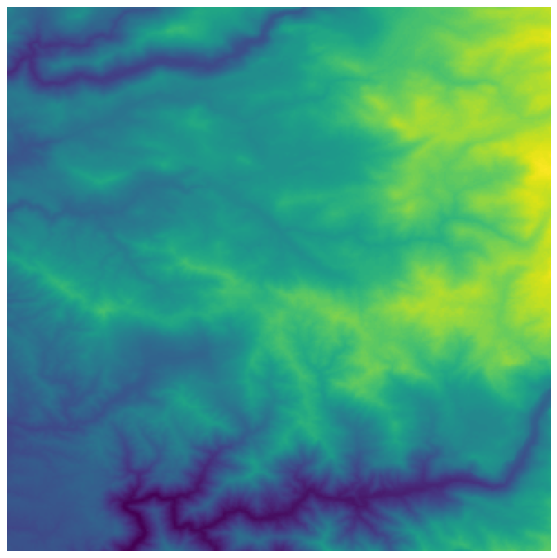

In [49]:
window = rio.windows.Window(300, 0, 300, 300)
subset = src_image.read(1, window=window)
fig, ax = plt.subplots(1, figsize=(12, 10))
show(subset, ax=ax)
ax.set_axis_off()
plt.show()

#END